   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


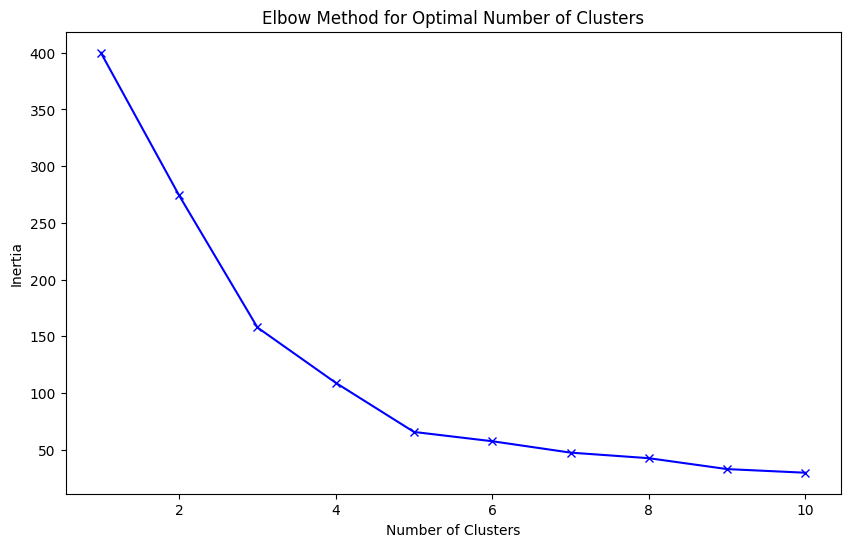

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1    Male   19                  15                      39   
1           2    Male   21                  15                      81   
2           3  Female   20                  16                       6   
3           4  Female   23                  16                      77   
4           5  Female   31                  17                      40   

   Cluster  
0        3  
1        4  
2        3  
3        4  
4        3  


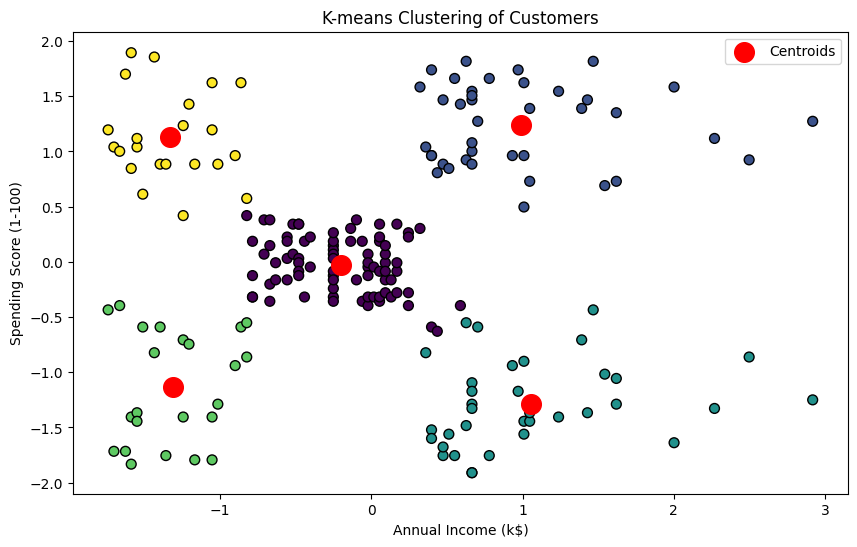

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the customer dataset
customer_data = pd.read_csv('/content/Mall_Customers.csv')

# Display the first few rows to understand the data structure
print(customer_data.head())

# Select relevant features for clustering (e.g., Annual Income, Spending Score)
# Adjust these column names based on what is present in your dataset
features = ['Annual Income (k$)', 'Spending Score (1-100)']
data_for_clustering = customer_data[features]

# Standardizing the features for better performance with K-means
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

# Using the Elbow Method to find the optimal number of clusters
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Setting the number of clusters based on the elbow point (e.g., k=5 here)
kmeans = KMeans(n_clusters=5, random_state=0)
customer_clusters = kmeans.fit_predict(data_scaled)

# Adding the cluster labels to the original dataset
customer_data['Cluster'] = customer_clusters

# Display the first few rows with cluster labels
print(customer_data.head())

# Visualizing the clusters (using only two features for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=customer_clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-means Clustering of Customers')
plt.legend()
plt.show()
